<a href="https://colab.research.google.com/github/alfia14/Stock_Price_Prediction/blob/main/Stock_market_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed,Input

In [ ]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

if __name__ == "__main__":
    file_id = '113xKknvyKP5vZbOVn6nyj2Em3TuDwXZF'
    destination = 'GOOG.csv'
    download_file_from_google_drive(file_id, destination)

In [ ]:
# reading the data from data file
df = pd.read_csv('GOOG.csv')
print(df[:5])


NameError: ignored

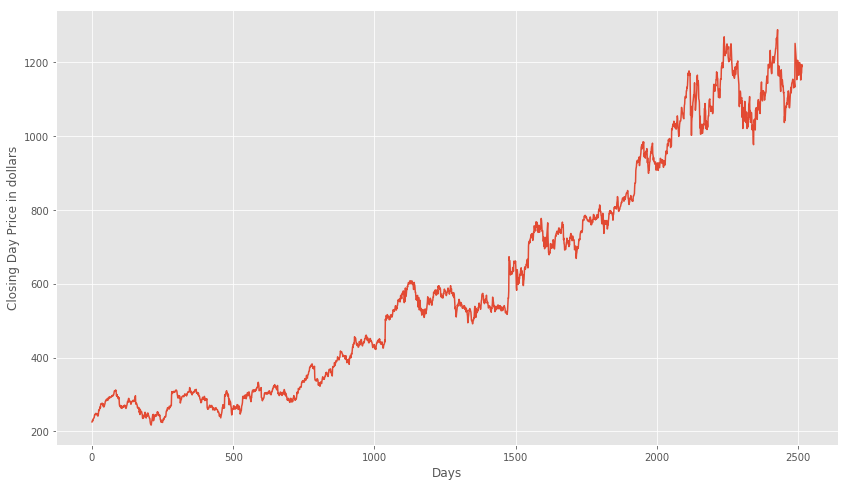

In [ ]:
# plotting the CLosing prices values
data = df.iloc[:,4].values
plt.style.use('ggplot')
plt.figure(figsize=(14, 8))
plt.xlabel('Days')
plt.ylabel('Closing Day Price in dollars')
plt.plot(data)

In [ ]:
# Divide into train and test data
df['Date'] = pd.to_datetime(df['Date'])
mask = (df['Date'] == '2019-4-18')
print(df.loc[mask])     # index for the date 18-Apr-2019
print('--------------------------------------------')
train = data[:205]
test = data[175:]
#print(train)

           Date         Open    High  ...        Close    Adj Close   Volume
2422 2019-04-18  1239.180054  1242.0  ...  1236.369995  1236.369995  1331800

[1 rows x 7 columns]
--------------------------------------------


In [ ]:
# Normalize the train and test data using min-max scaler
sc = MinMaxScaler(feature_range = (0, 1))
train = sc.fit_transform(train.reshape(-1,1))
test = sc.transform(test.reshape(-1,1))
print(train.shape)
print(test.shape)

(205, 1)
(2341, 1)


In [ ]:
#Create X_train using 30 timesteps for each sample
X_train = []
y_train = []
for i in range(30, train.shape[0]):
    X_train.append(train[i-30:i, 0])
    y_train.append(train[i, 0])
    print( X_train)
    print(y_train)
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_train)
print(y_train[:2])

(175, 30) (175,)
[[0.         0.02595818 0.04771492 ... 0.40882942 0.4207437  0.4737539 ]
 [0.02595818 0.04771492 0.03228963 ... 0.4207437  0.4737539  0.44261557]
 [0.04771492 0.03228963 0.06308274 ... 0.4737539  0.44261557 0.55738478]
 ...
 [0.3225509  0.30148494 0.33308397 ... 0.27063417 0.20461606 0.19132039]
 [0.30148494 0.33308397 0.31380226 ... 0.20461606 0.19132039 0.16714628]
 [0.33308397 0.31380226 0.31633477 ... 0.19132039 0.16714628 0.127144  ]]
[0.44261557 0.55738478]


In [ ]:
# Training LSTM model

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
lstm_model = Sequential()
lstm_model.add(LSTM(8, input_shape=(X_train.shape[1], 1), activation='relu',kernel_initializer='lecun_uniform'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

lstm_model.fit(X_train, y_train, epochs = 45, batch_size = 4)

Epoch 1/45
175/175 [==============================] - 4s 23ms/step - loss: 0.0273
Epoch 2/45
175/175 [==============================] - 3s 18ms/step - loss: 0.0131
Epoch 3/45
175/175 [==============================] - 3s 18ms/step - loss: 0.0091
Epoch 4/45
175/175 [==============================] - 3s 17ms/step - loss: 0.0073
Epoch 5/45
175/175 [==============================] - 3s 18ms/step - loss: 0.0062
Epoch 6/45
175/175 [==============================] - 3s 18ms/step - loss: 0.0055
Epoch 7/45
175/175 [==============================] - 3s 18ms/step - loss: 0.0050
Epoch 8/45
175/175 [==============================] - 3s 18ms/step - loss: 0.0047
Epoch 9/45
175/175 [==============================] - 3s 18ms/step - loss: 0.0043
Epoch 10/45
175/175 [==============================] - 3s 17ms/step - loss: 0.0040
Epoch 11/45
175/175 [==============================] - 3s 18ms/step - loss: 0.0039
Epoch 12/45
175/175 [==============================] - 3s 18ms/step - loss: 0.0037
Epoch 13/45
1

In [ ]:
# Create X_test using 30 timesteps for each sample
X_test = []
y_test = []

for i in range(30, test.shape[0]):
    X_test.append(test[i-30:i, 0])
    y_test.append(test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(2311, 30)
(2311, 30, 1)


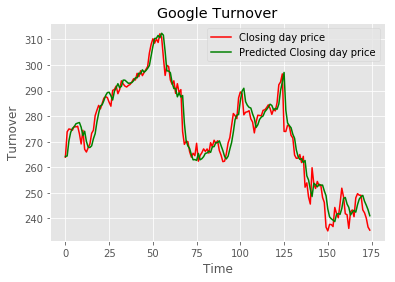

In [ ]:
# plot predictions vs real prices on training set
predicted = lstm_model.predict(X_train)
predicted = sc.inverse_transform(predicted)
plt.plot(sc.inverse_transform(train[-175:]), color = 'red', label = 'Closing day price')
plt.plot(predicted, color = 'green', label = 'Predicted Closing day price')
plt.title('Google Turnover')
plt.xlabel('Time')
plt.ylabel('Turnover')
plt.legend()
plt.show()

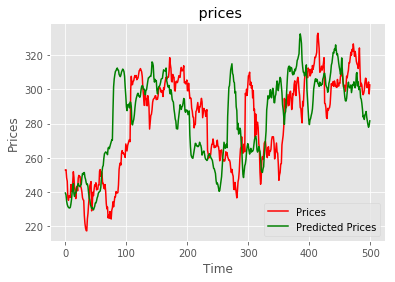

In [ ]:
# plotting predictions vs true prices for the test set
predicted = lstm_model.predict(X_test)
predicted = sc.inverse_transform(predicted)
plt.plot(sc.inverse_transform(test)[:500] , color= 'red', label = 'Prices')
plt.plot(predicted[:500], color = 'green', label = 'Predicted Prices')
plt.title(' prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.show()